<a href="https://colab.research.google.com/github/nykim627/B.A.F_2023_JAN/blob/main/NH_EDA_0911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 현재 경로 확인
import os

print(os.getcwd())

/content


In [10]:
# 시각화 위한 라이브러리 및 모듈 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc

In [17]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.0 MB/s eta 0:00:00


In [15]:
# 한글폰트 깨짐방지 설정 - mac의 경우
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 폰트설정
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 1. 해외종목정보: stk_info

In [47]:
# 데이터 불러오기
import pandas as pd
pd.set_option('display.max_columns', 25)

# [1] 상품공통테이블 - 1. 해외종목정보 (2024/08/27 기준)
stk_info = pd.read_csv("drive/MyDrive/2024_NH/open/NH_CONTEST_NW_FC_STK_IEM_IFO.csv")
print(stk_info.columns)
stk_info.columns = ['티커종목코드','외화증권한글명','외화증권영문명','주식/ETF구분코드','상장주식총수량','외화시장구분코드',
                '회사주소','웹주소','업종분류명','CEO명','영문사업개요내용','섹터분류명','산업명','시가총액']
stk_info = stk_info.drop(['회사주소','웹주소','CEO명','업종분류명','영문사업개요내용','외화증권한글명','외화시장구분코드','산업명'], axis=1)
print(stk_info.info())
stk_info.tail(10)

Index(['tck_iem_cd', 'fc_sec_krl_nm', 'fc_sec_eng_nm', 'stk_etf_dit_cd',
       'ltg_tot_stk_qty', 'fc_mkt_dit_cd', 'co_adr', 'web_adr', 'btp_cfc_nm',
       'ceo_nm', 'eng_utk_otl_cts', 'ser_cfc_nm', 'ids_nm', 'mkt_pr_tot_amt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   티커종목코드      3096 non-null   object 
 1   외화증권영문명     3096 non-null   object 
 2   주식/ETF구분코드  3096 non-null   object 
 3   상장주식총수량     3096 non-null   int64  
 4   섹터분류명       3096 non-null   object 
 5   시가총액        3096 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 145.2+ KB
None


,티커종목코드,외화증권영문명,주식/ETF구분코드,상장주식총수량,섹터분류명,시가총액
3086,ZNTL,Zentalis Pharms ...,주식,71106719,Healthcare,226.12
3087,ZS,Zscaler ...,주식,151149087,Technology,29898.80
3088,ZTS,Zoetis ...,주식,453050990,Healthcare,82255.94
3089,ZUMZ,Zumiez ...,주식,20274412,Consumer Cyclical,577.62
3090,ZUO,Zuora ...,주식,148102000,Technology,1350.71
3091,ZURA,Zura Bio ...,주식,63207088,Healthcare,255.99
3092,ZVRA,Zevra ...,주식,52617789,Healthcare,372.01
3093,ZWS,Zurn Elkay Wtr ...,주식,170928495,Industrials,5485.10
3094,ZYME,Zymeworks ...,주식,71618027,Healthcare,819.89
3095,ZYXI,Zynex ...,주식,31742522,Healthcare,265.05


In [48]:
stk_info = stk_info[(stk_info['시가총액']!=0)]
len(stk_info)

2877

In [49]:
stk_info[stk_info['상장주식총수량']==0]

,티커종목코드,외화증권영문명,주식/ETF구분코드,상장주식총수량,섹터분류명,시가총액
78,AG,First Majestic ...,주식,0,Basic Materials,1747.95
82,AGI,Alamos Gol ...,주식,0,Basic Materials,8204.48
118,ALC,Alcon ...,주식,0,Healthcare,47125.90
227,AQN,Algonqn Pwr & Ut ...,주식,0,Utilities,4144.17
353,BATRK,Atlanta Braves ...,주식,0,Communication Services,2697.69
...,...,...,...,...,...,...
2808,UA,Under Armour ...,주식,0,Consumer Cyclical,3580.06
2851,UROY,Uranium Royalty ...,주식,0,Energy,269.56
2888,VET,Vermilion Energy ...,주식,0,Energy,1625.32
2979,WFG,West Fraser Timb ...,주식,0,Basic Materials,7251.17


In [50]:
stk_info['섹터분류명'].value_counts()

,count
섹터분류명,
Healthcare,520
Financial Services,437
Technology,435
Industrials,395
Consumer Cyclical,326
Real Estate,181
Energy,132
Basic Materials,129
Consumer Defensive,128


#### stk_info 함수 전처리 정리 (칼럼 및 행 drop)
1. '회사주소','웹주소','CEO명','업종분류명','영문사업개요내용','외화증권한글명','외화시장구분코드' 열 drop
    - 상대적으로 불필요한 변수들이라 판단.
    - '외화증권한글명'은 일단 보류. 근데 티커코드 있는 이상 버려도 될것 같기는 하다.
2. 주식/ETF구분코드 중 ETF인 경우 모두 시총 0(총167행) + 주식인 경우 중 시총 0인 경우(총52행)
    - 가치 없는 정보라 판단하고 제거 (남은행 총 3096-219=2877)
    - 시총 0인 경우를 제거했더니 상장주식총수량 0인 경우가 64행 남음.(모두 '주식')
    - *__!!상장주식총수량 0인 경우를 제거할지 말지 확정 못함. 이경우는 어짜피 못사는 경우라 판단하고 제거하는 게 나을 수도 있을 것 같음.__*
3. '섹터분류명' 남기고 '산업명'drop. 산업명은 너무 세부적으로 분류되어 있다고 판단.
    - '섹터분류명'은 총 11섹터로 이루어짐. => 뉴스 분석 후 섹터 분류 시 활용 가능

In [51]:
# 수치형 변수 확인: 상장주식총수량, 시가총액
stk_info.describe()

,상장주식총수량,시가총액
count,2.877000e+03,2.877000e+03
mean,2.399375e+08,2.204780e+04
std,7.955767e+08,1.354829e+05
min,0.000000e+00,1.410000e+00
25%,3.820040e+07,7.204900e+02
50%,8.418103e+07,2.567740e+03
75%,1.972010e+08,9.149860e+03
max,2.460000e+10,3.454684e+06


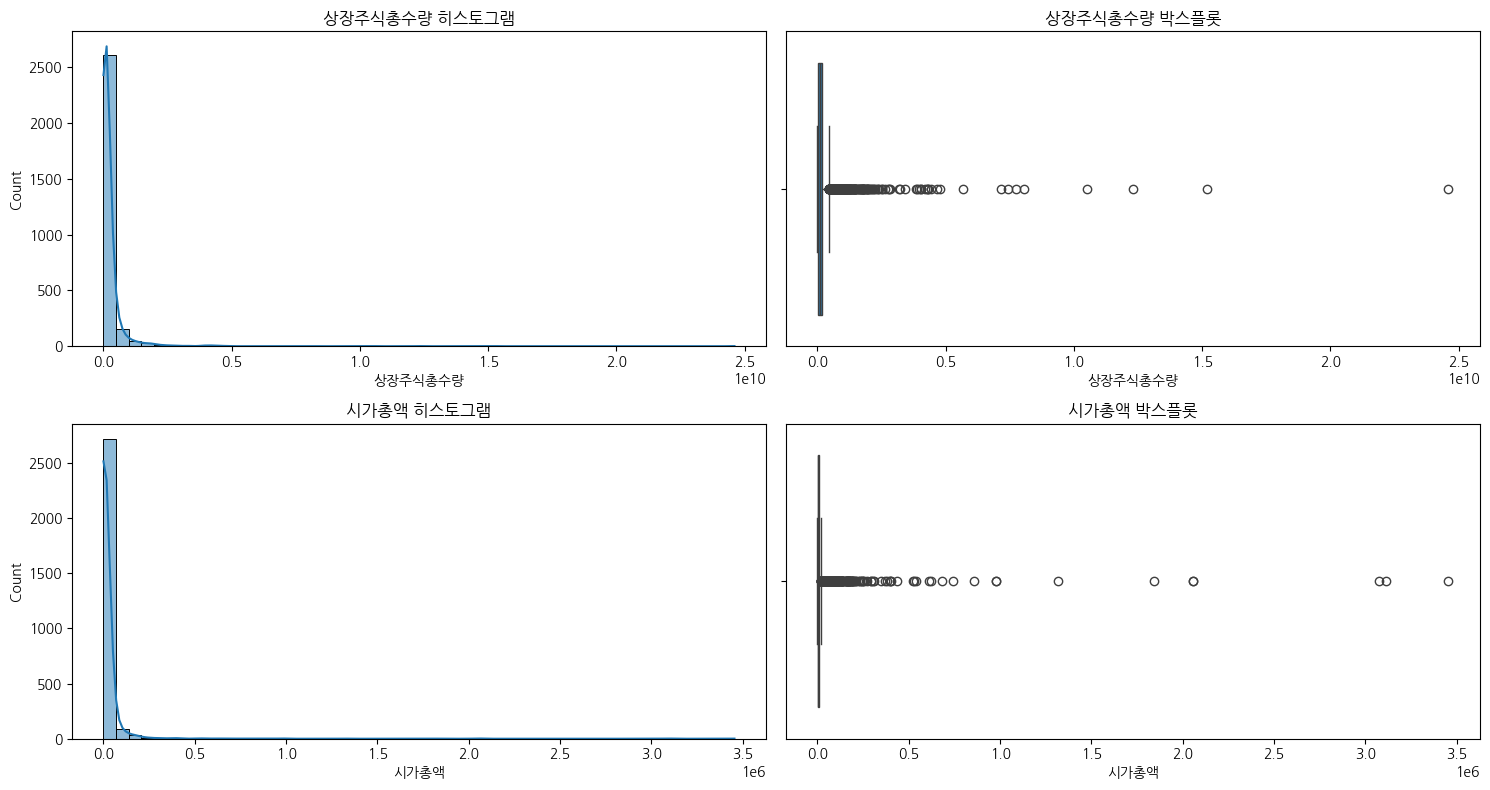

In [52]:
# 시각화함수 설정
def visualize_data(df):
    """
    주어진 데이터프레임의 수치형 변수를 이용하여 히스토그램과 박스플롯을 시각화하는 함수.

    Parameters:
    - df (pd.DataFrame): 시각화할 데이터프레임

    Returns:
    - None: 시각화를 수행하고, 플롯을 출력합니다.
    """
    # 데이터프레임에서 수치형 변수 추출
    numeric_vars = df.select_dtypes(include='number').columns.tolist()

    if not numeric_vars:
        print("수치형 변수가 없습니다.")
        return

    # 변수 개수에 맞게 서브플롯 생성
    fig, axes = plt.subplots(len(numeric_vars), 2, figsize=(15, len(numeric_vars) * 4))

    # 수치형 변수마다 시각화
    for i, var in enumerate(numeric_vars):
        # 히스토그램
        sns.histplot(df[var], bins=50, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'{var} 히스토그램')

        # 박스플롯
        sns.boxplot(x=df[var], ax=axes[i, 1])
        axes[i, 1].set_title(f'{var} 박스플롯')

    plt.tight_layout()
    plt.show()


# 시각화 함수 사용
visualize_data(stk_info)


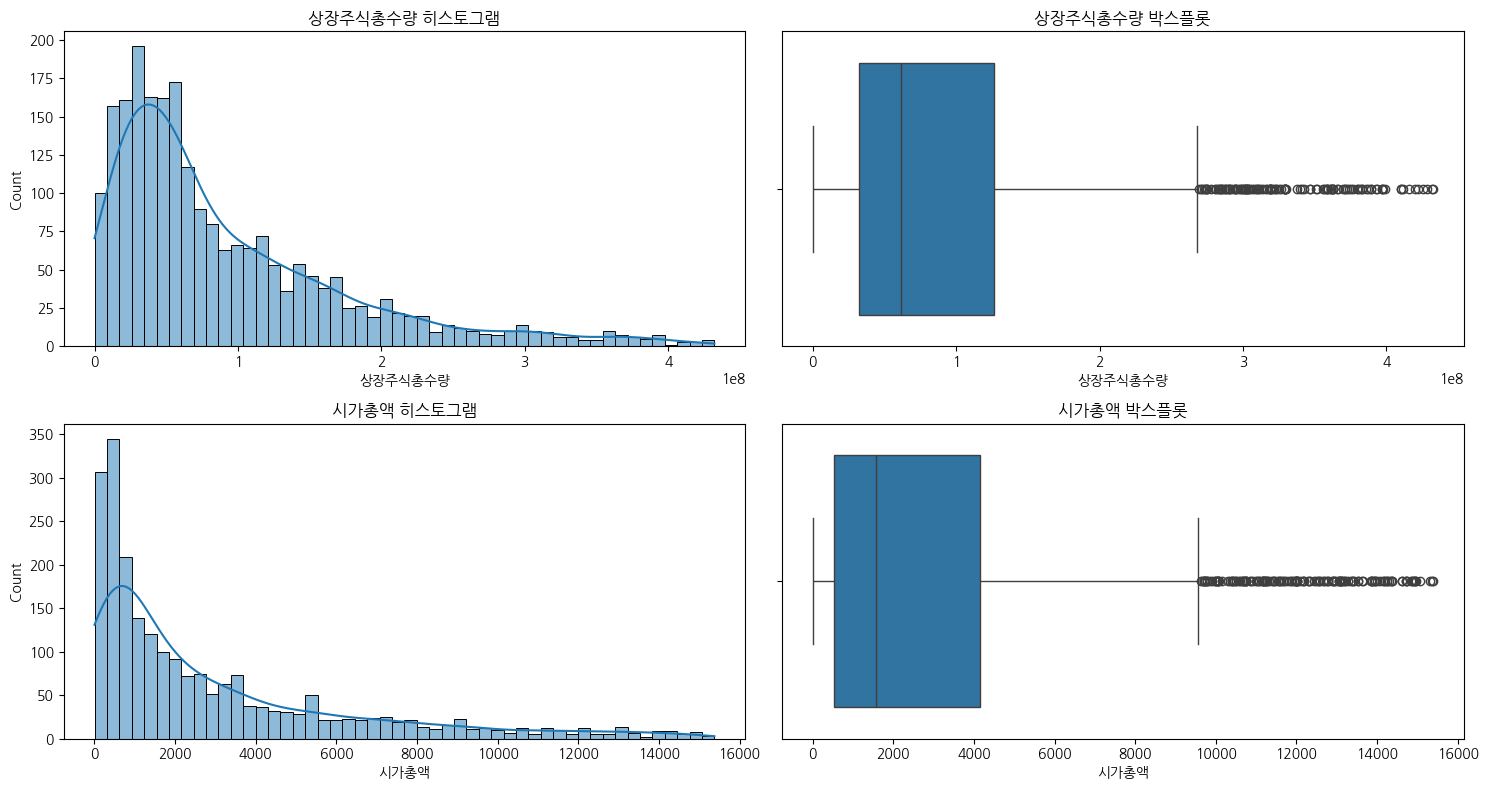

In [53]:
# 극단값 제거 함수
def remove_outliers(df, column):

    # 1사분위수(25%)와 3사분위수(75%) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # IQR 계산
    IQR = Q3 - Q1
    # 하한선과 상한선 계산 (IQR의 1.5배를 기준으로 설정)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # 하한선과 상한선 밖의 값 제거
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

variables = ['상장주식총수량', '시가총액']

# 각 변수별로 극단치를 제거
for var in variables:
    stk_info = remove_outliers(stk_info, var)

# 시각화 함수 사용
visualize_data(stk_info)

In [54]:
import numpy as np
'''
# 로그 변환 함수
def log_transform(df, column):
    # 모든 값이 양수인지 확인
    min_value = df[column].min()
    if min_value <= 0:
        # 최소값이 0보다 크도록 조정 (필요시)
        df[column] = df[column] + abs(min_value) + 1

    # 로그 변환 적용
    df[column] = np.log(df[column])


# 각 변수에 로그 변환 적용
variables = ['상장주식총수량', '시가총액']

for var in variables:
    log_transform(stk_info, var)

# 시각화 함수 사용
visualize_data(stk_info)
'''

"\n# 로그 변환 함수\ndef log_transform(df, column):\n    # 모든 값이 양수인지 확인\n    min_value = df[column].min()\n    if min_value <= 0:\n        # 최소값이 0보다 크도록 조정 (필요시)\n        df[column] = df[column] + abs(min_value) + 1\n    \n    # 로그 변환 적용\n    df[column] = np.log(df[column])\n\n\n# 각 변수에 로그 변환 적용\nvariables = ['상장주식총수량', '시가총액']\n\nfor var in variables:\n    log_transform(stk_info, var)\n\n# 시각화 함수 사용\nvisualize_data(stk_info)\n"

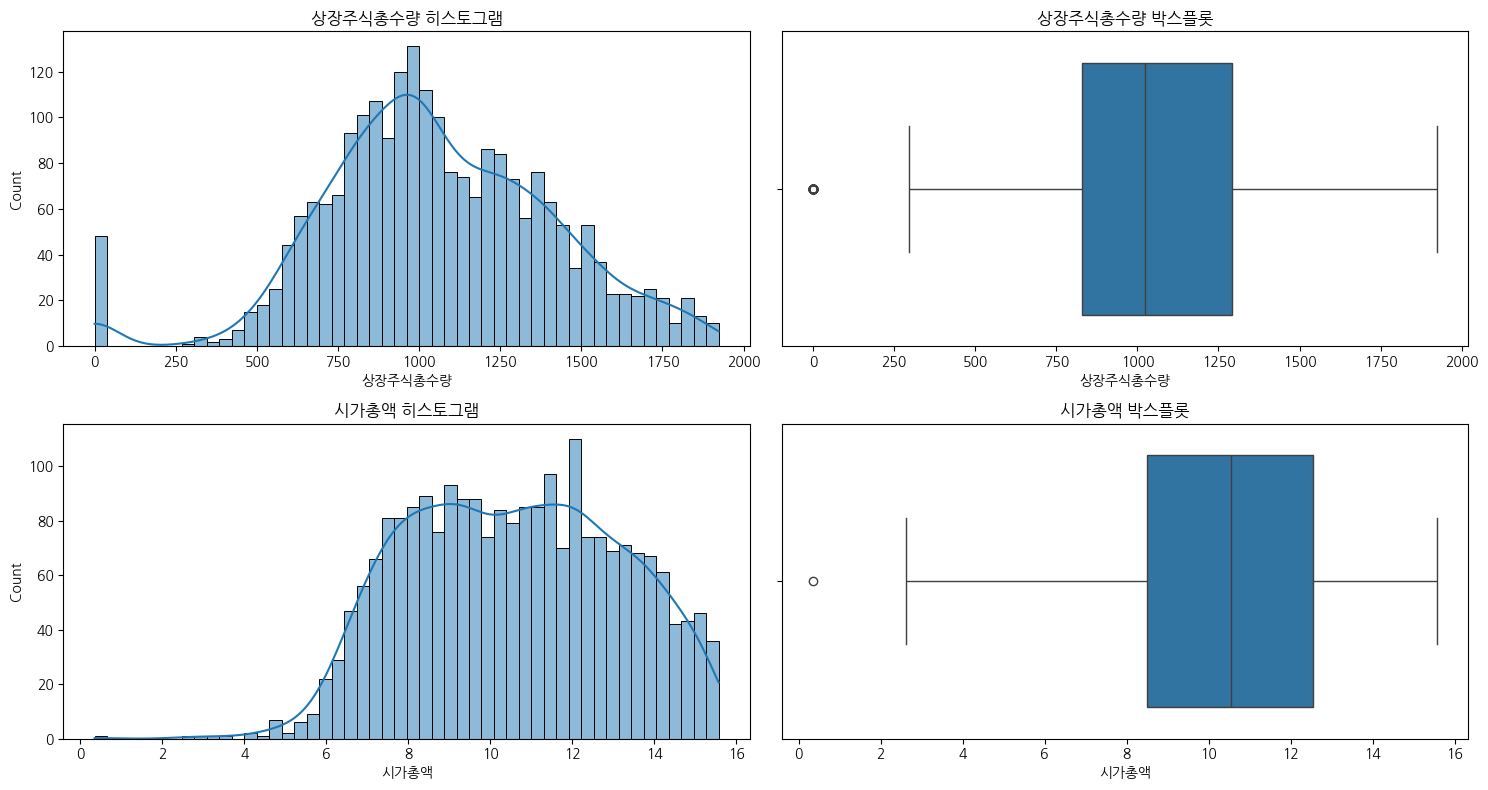

In [57]:
from scipy.stats import boxcox

# Box-Cox 변환 함수
def boxcox_transform(df, column):
    # 모든 값이 양수인지 확인
    min_value = df[column].min()
    if min_value <= 0:
        # 최소값이 0보다 크도록 조정 (필요시)
        df[column] = df[column] + abs(min_value) + 1

    # Box-Cox 변환 적용
    transformed_data, _ = boxcox(df[column])
    df[column] = transformed_data

# 각 변수에 Box-Cox 변환 적용
variables = ['상장주식총수량', '시가총액']

for var in variables:
    boxcox_transform(stk_info, var)


# 시각화 함수 사용
visualize_data(stk_info)

> 0에 여전히 분포가 남아있음.
> 상장수직총수량 0인 경우 제외하고 하면 좀 더 나을 듯.

In [58]:
stk_info.head(10)

,티커종목코드,외화증권영문명,주식/ETF구분코드,상장주식총수량,섹터분류명,시가총액
0,AA,Alcoa Corp ...,주식,1627.628305,Basic Materials,14.272161
2,AAN,Aaron's Company ...,주식,822.657305,Industrials,7.612577
3,AAOI,AOI ...,주식,907.231445,Technology,7.978795
4,AAON,AAON ...,주식,1117.347972,Industrials,13.902867
5,AAP,Advance Auto ...,주식,1011.802880,Consumer Cyclical,11.815366
9,AAT,Amercn Asst Trst ...,주식,1018.511504,Real Estate,10.603997
11,ABCB,Ameris ...,주식,1060.967945,Financial Services,12.597089
12,ABCL,Abcellera ...,주식,1698.560076,Healthcare,9.240410
13,ABG,Asbury Auto GP ...,주식,709.164643,Consumer Cyclical,12.906928
14,ABM,ABM Industries ...,주식,1028.517282,Industrials,12.191131


In [56]:
# [1] 상품공통테이블 - 2. 종목 일자별 시세 정보 (2024/05/28 ~ 2024/08/27)
stk_qut = pd.read_csv("open/NH_CONTEST_STK_DT_QUT.csv")
print(stk_qut.columns)
stk_qut.columns = ['거래일자','티커종목코드','종목시가','종목고가','종목저가','종목종가',
                '전일대비증감가격','전일대비증감율','누적거래수량','거래대금','매도체결합계수량','매수체결합계수량','환율']
print(stk_qut.info())

FileNotFoundError: [Errno 2] No such file or directory: 'open/NH_CONTEST_STK_DT_QUT.csv'

In [ ]:
stk_qut.head(10)

,거래일자,티커종목코드,종목시가,종목고가,종목저가,종목종가,전일대비증감가격,전일대비증감율,누적거래수량,거래대금,매도체결합계수량,매수체결합계수량,환율
0,20240722,AAL,10.49,10.740,10.3500,10.69,0.11,1.04,38895463.0,414252965.0,0.0,0.0,1386.6
1,20240603,AAL,11.60,11.945,11.5000,11.53,0.03,0.26,52899042.0,609925954.0,27221369.0,25722473.0,1381.6
2,20240531,AAL,11.51,11.570,11.2500,11.50,0.06,0.52,60868405.0,699986658.0,28279620.0,32588785.0,1376.5
3,20240625,AAL,11.18,11.365,11.1200,11.13,-0.03,-0.27,28547274.0,317731160.0,17399022.0,11148252.0,1389.7
4,20240605,AAL,11.51,11.765,11.4500,11.62,0.12,1.04,34340914.0,399041421.0,17637074.0,16703939.0,1373.1
5,20240611,AAL,11.41,11.450,11.2600,11.28,-0.21,-1.83,25439678.0,286959568.0,13002164.0,12937514.0,1377.9
6,20240823,AAL,10.23,10.500,10.1700,10.39,0.25,2.47,24640044.0,256010057.0,16180145.0,14215125.0,1335.9
7,20240528,AAL,13.85,13.905,13.4200,13.44,-0.40,-2.89,32710288.0,439626271.0,20213260.0,12506828.0,1365.4
8,20240726,AAL,10.70,10.755,10.2147,10.62,0.02,0.19,45684501.0,483113598.0,27152051.0,25233034.0,1385.4
9,20240730,AAL,10.46,10.930,10.4600,10.76,0.33,3.16,52963153.0,567235476.0,0.0,0.0,1382.0


#### [1]-2. 컬럼별 분석 방향 잡기
- 거래일자: 시계열로 나열해야함. 날짜 데이터로 먼저 변경하고 시계열순으로 나열.(1)
- 티커종목코드: 이거 기준으로 데이터를 합칠 수 있을까? 생각해보자
- 종목시가/고가/저가/종가: 주식 데이터 분석하는 것처럼 분석해야 하는데 흠... 어케하지...?
- 전일대비증감가격/전일대비증감율: 얘도 아직 감을 못잡음. 주식데이터 전처리나 분석 방법 좀 찾아보기. 증감율이 큰 경우에 주목.
- 누적거래수량/거래대금: 통계량 확인
- 매도채결합계수량/매수체결합계수량: 0인 경우는 모징
- 환율: 환율은... 버려도 되지 않을까?
- 거래일자 날짜 데이터로 변경 후 describe해서 수치형변수 통계량들 확인

In [ ]:
# 거래일자 날짜형으로 변경
stk_qut['거래일자'] = pd.to_numeric(stk_qut['거래일자'])
#stk_qut['거래일자'] = pd.to_datetime(stk_qut['거래일자'], format='%Y%m%d')

In [ ]:
stk_qut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194831 entries, 0 to 194830
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      194831 non-null  int64  
 1   티커종목코드    194831 non-null  object 
 2   종목시가      194831 non-null  float64
 3   종목고가      194831 non-null  float64
 4   종목저가      194831 non-null  float64
 5   종목종가      194831 non-null  float64
 6   전일대비증감가격  194831 non-null  float64
 7   전일대비증감율   194831 non-null  float64
 8   누적거래수량    194831 non-null  float64
 9   거래대금      194831 non-null  float64
 10  매도체결합계수량  194831 non-null  float64
 11  매수체결합계수량  194831 non-null  float64
 12  환율        194831 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 19.3+ MB


In [ ]:
stk_qut.head()

,거래일자,티커종목코드,종목시가,종목고가,종목저가,종목종가,전일대비증감가격,전일대비증감율,누적거래수량,거래대금,매도체결합계수량,매수체결합계수량,환율
0,20240722,AAL,10.49,10.740,10.35,10.69,0.11,1.04,38895463.0,414252965.0,0.0,0.0,1386.6
1,20240603,AAL,11.60,11.945,11.50,11.53,0.03,0.26,52899042.0,609925954.0,27221369.0,25722473.0,1381.6
2,20240531,AAL,11.51,11.570,11.25,11.50,0.06,0.52,60868405.0,699986658.0,28279620.0,32588785.0,1376.5
3,20240625,AAL,11.18,11.365,11.12,11.13,-0.03,-0.27,28547274.0,317731160.0,17399022.0,11148252.0,1389.7
4,20240605,AAL,11.51,11.765,11.45,11.62,0.12,1.04,34340914.0,399041421.0,17637074.0,16703939.0,1373.1


In [ ]:
# 수치형 데이터 통계량 확인
stk_qut.describe()
# 종목시가/고가/저가/종가는 통계량 보는게 의미가 없을 듯. 어짜피 다 다른 주식 가격이라...
# 전일대비증감가격, 전일대비증감을을 봅시당.

,거래일자,종목시가,종목고가,종목저가,종목종가,전일대비증감가격,전일대비증감율,누적거래수량,거래대금,매도체결합계수량,매수체결합계수량,환율
count,1.948310e+05,194831.000000,194831.000000,194831.000000,194831.000000,194831.000000,194831.000000,1.948310e+05,1.948310e+05,1.948310e+05,1.948310e+05,194831.000000
mean,2.024070e+07,279.655950,286.045965,280.585165,283.276791,0.418579,0.113821,2.352147e+06,1.633441e+08,1.365590e+06,1.422724e+06,1374.486420
std,8.847288e+01,11348.123425,11557.973992,11366.063481,11458.284605,117.436967,3.388635,9.377857e+06,1.236345e+09,8.755938e+06,8.726776e+06,13.824155
min,2.024053e+07,0.000000,0.000000,0.000000,0.000000,-21395.000000,-93.300000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1332.000000
25%,2.024062e+07,11.990000,12.215000,11.760000,11.990000,-0.310000,-1.240000,2.213275e+05,4.193982e+06,1.301530e+05,1.313800e+05,1370.300000
50%,2.024071e+07,30.880000,31.380000,30.400000,30.910000,0.010000,0.060000,6.430980e+05,1.937541e+07,4.103990e+05,4.155420e+05,1377.900000
75%,2.024080e+07,77.660000,78.662500,76.720000,77.695000,0.400000,1.410000,1.711592e+06,7.994706e+07,1.088461e+06,1.113103e+06,1383.800000
max,2.024083e+07,682960.085000,741971.390000,680180.010000,682200.000000,13497.170000,272.060000,6.554847e+08,8.296469e+10,2.105428e+09,1.923581e+09,1390.100000


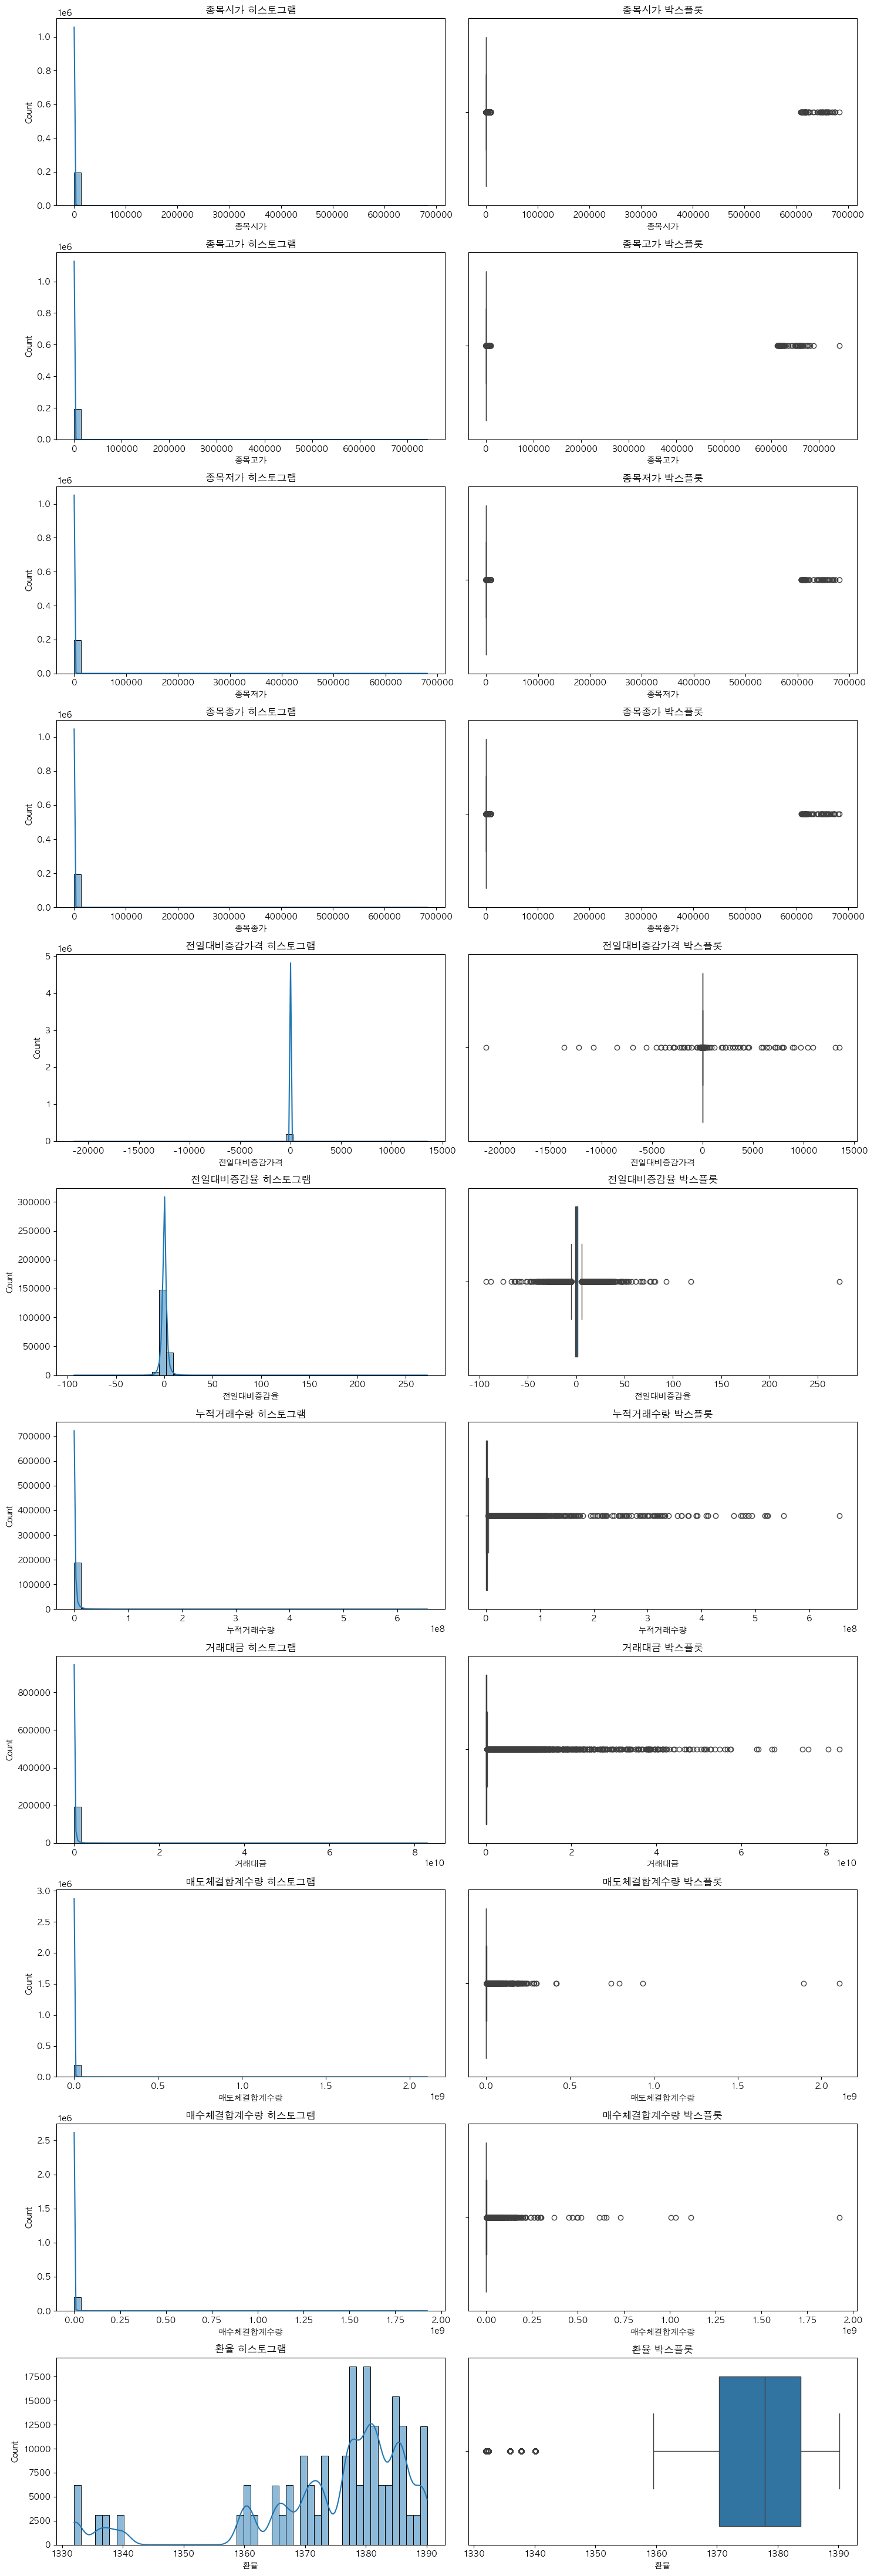

In [ ]:
# 히스토그램과 박스플롯 시각화를 위한 변수 목록
variables = [
    '종목시가', '종목고가', '종목저가', '종목종가',
    '전일대비증감가격', '전일대비증감율', '누적거래수량',
    '거래대금', '매도체결합계수량', '매수체결합계수량', '환율'
]

# 전체 변수에 대한 시각화
fig, axes = plt.subplots(len(variables), 2, figsize=(15, len(variables) * 4))

for i, var in enumerate(variables):
    # 히스토그램
    sns.histplot(stk_qut[var], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} 히스토그램')

    # 박스플롯
    sns.boxplot(x=stk_qut[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} 박스플롯')

plt.tight_layout()
plt.show()

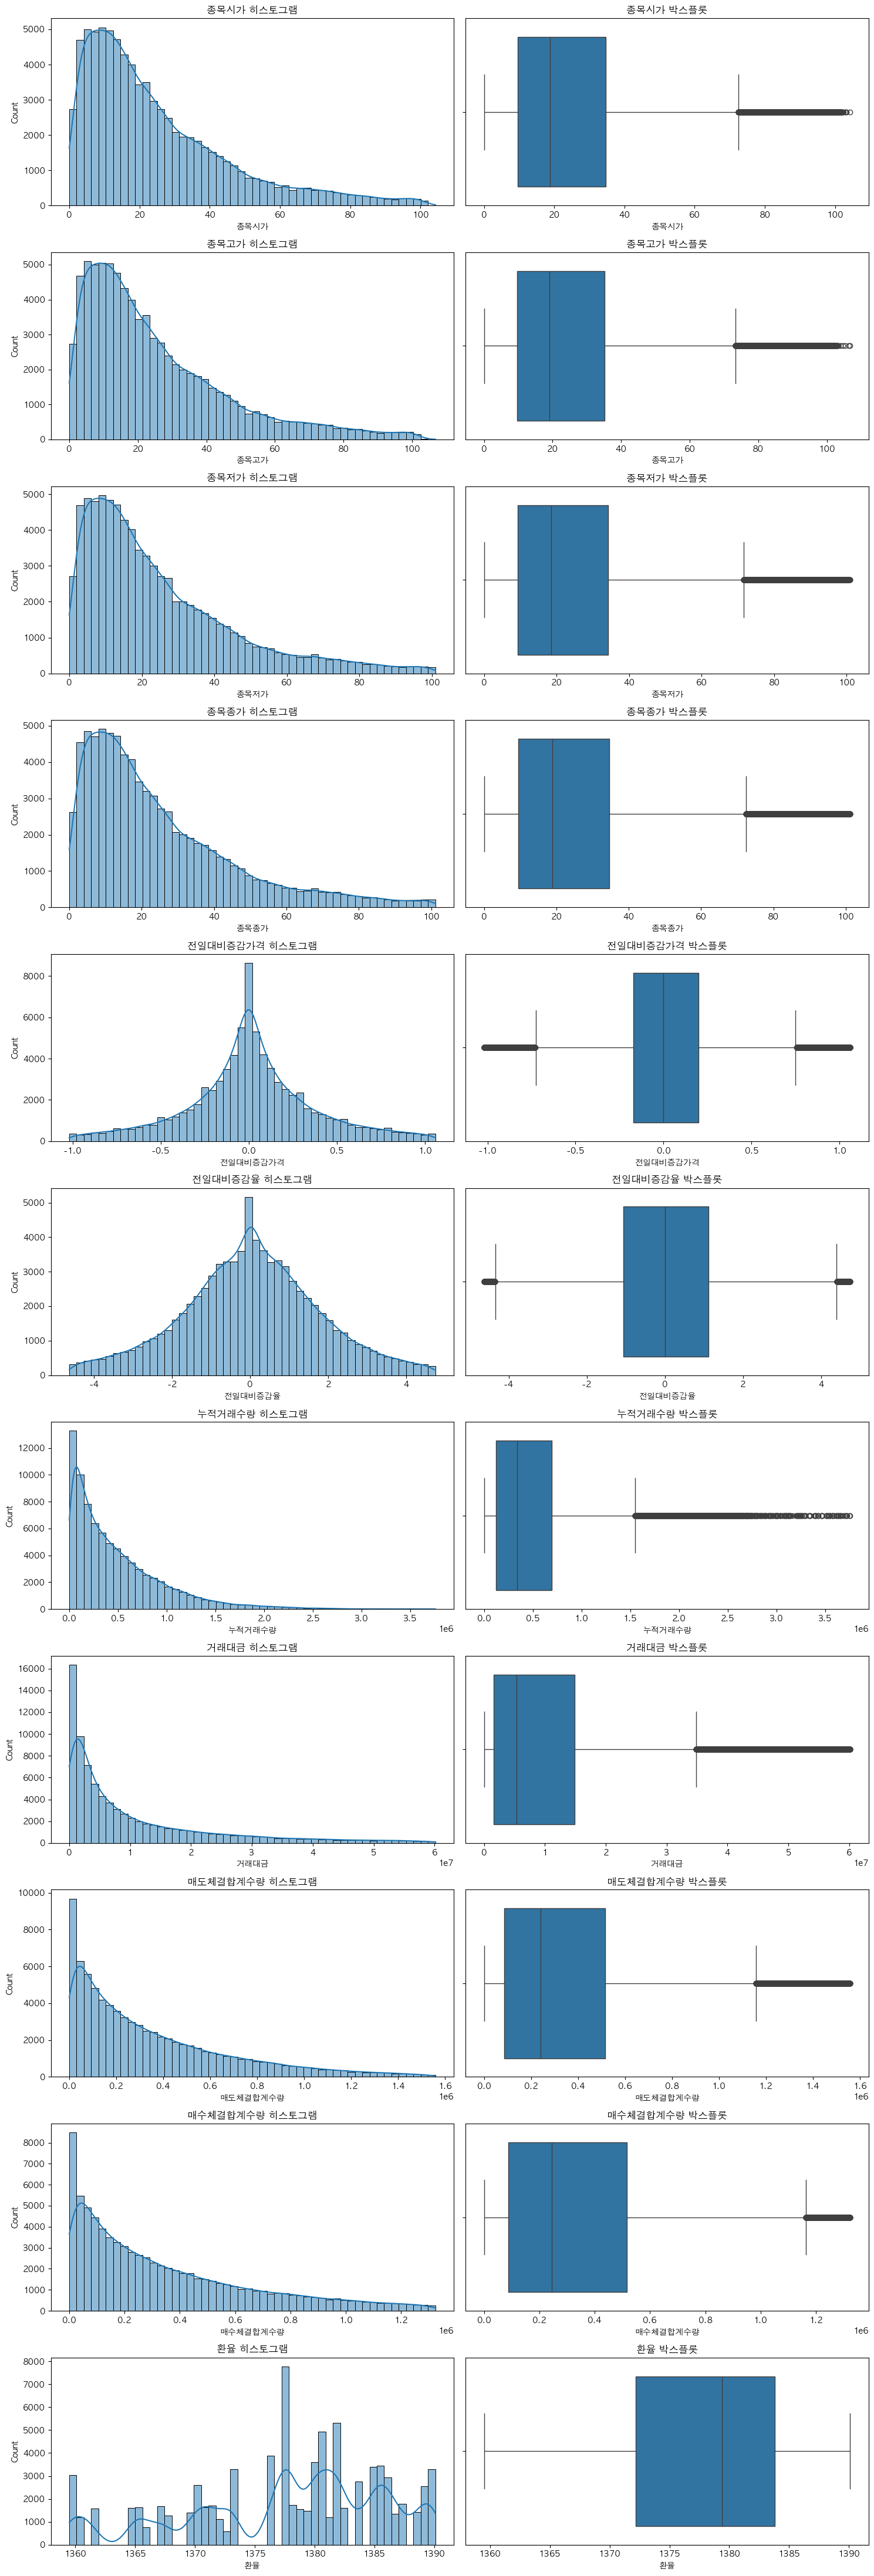

In [ ]:
# 각 변수별로 극단치를 제거
for var in variables:
    stk_qut = remove_outliers(stk_qut, var)

# 극단치 제거 후 전체 변수에 대한 시각화
fig, axes = plt.subplots(len(variables), 2, figsize=(15, len(variables) * 4))

for i, var in enumerate(variables):
    # 히스토그램
    sns.histplot(stk_qut[var], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} 히스토그램')

    # 박스플롯
    sns.boxplot(x=stk_qut[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} 박스플롯')

plt.tight_layout()
plt.show()

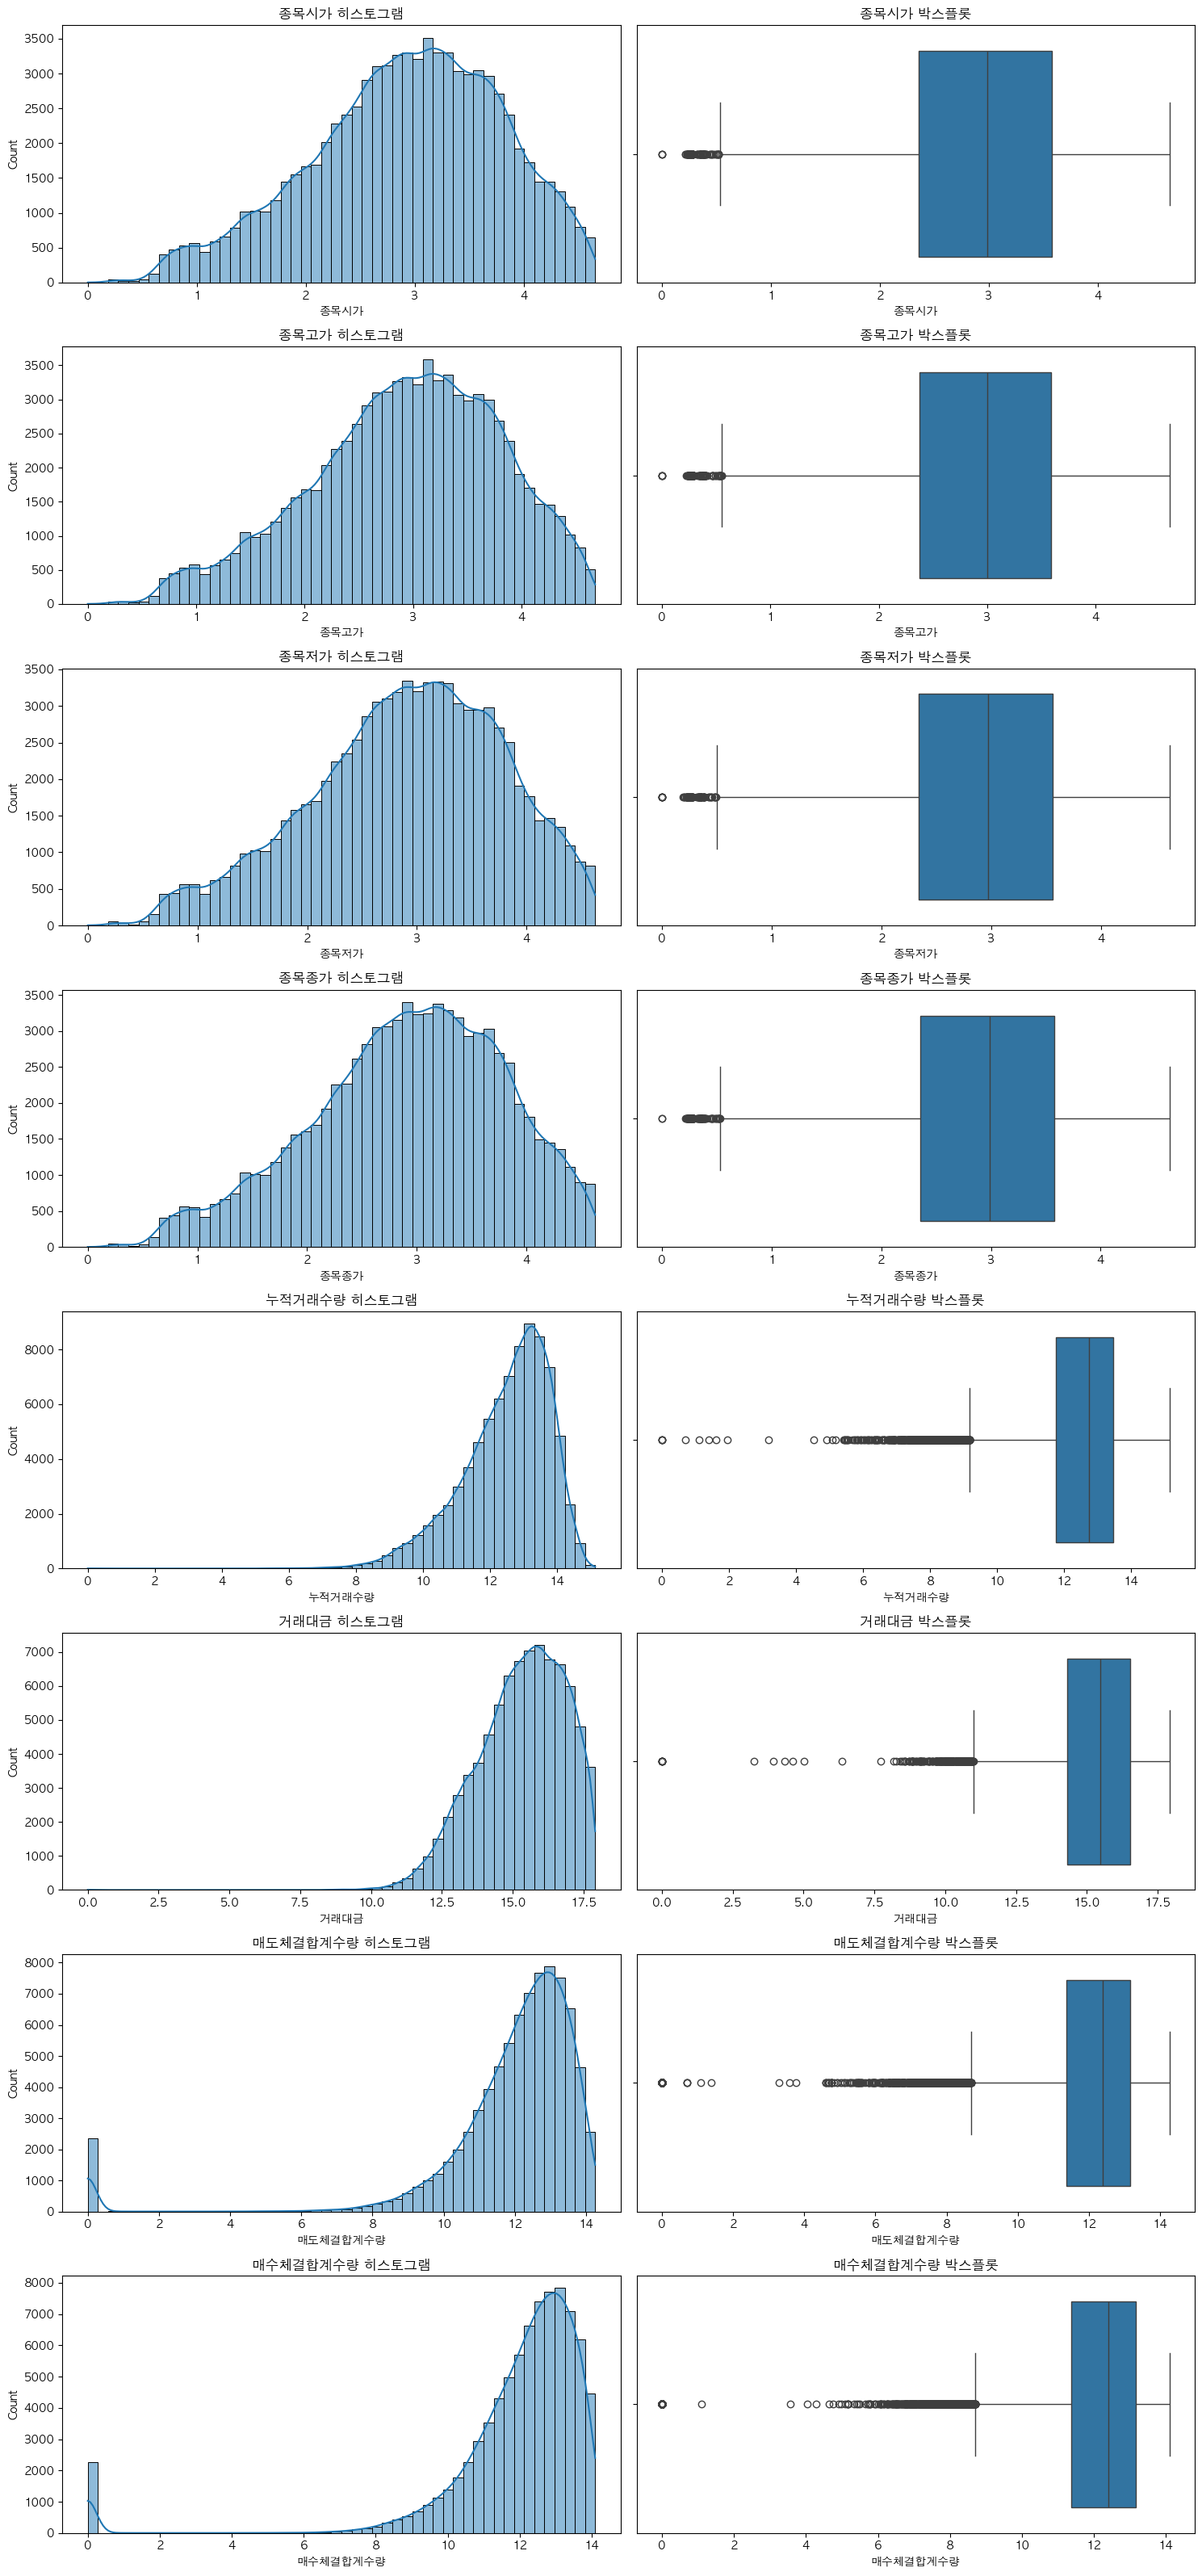

In [ ]:
# 왜도가 여전히 있는 변수들에 대해 로그변환 ('종목시가', '종목고가', '종목저가', '종목종가', '누적거래수량', '거래대금', '매도체결합계수량', '매수체결합계수량')
import numpy as np
'''
# 변환할 변수 목록
variables = [
    '종목시가', '종목고가', '종목저가', '종목종가',
    '누적거래수량', '거래대금', '매도체결합계수량', '매수체결합계수량'
]

# 로그 변환 함수
def log_transform(df, column):
    # 모든 값이 양수인지 확인
    min_value = df[column].min()
    if min_value <= 0:
        # 최소값이 0보다 크도록 조정 (필요시)
        df[column] = df[column] + abs(min_value) + 1

    # 로그 변환 적용
    df[column] = np.log(df[column])

# 각 변수에 로그 변환 적용
for var in variables:
    log_transform(stk_qut, var)

# 변환 후 전체 변수에 대한 시각화
fig, axes = plt.subplots(len(variables), 2, figsize=(15, len(variables) * 4))

for i, var in enumerate(variables):
    # 히스토그램
    sns.histplot(stk_qut[var], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} 히스토그램')

    # 박스플롯
    sns.boxplot(x=stk_qut[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} 박스플롯')

plt.tight_layout()
plt.show()
'''

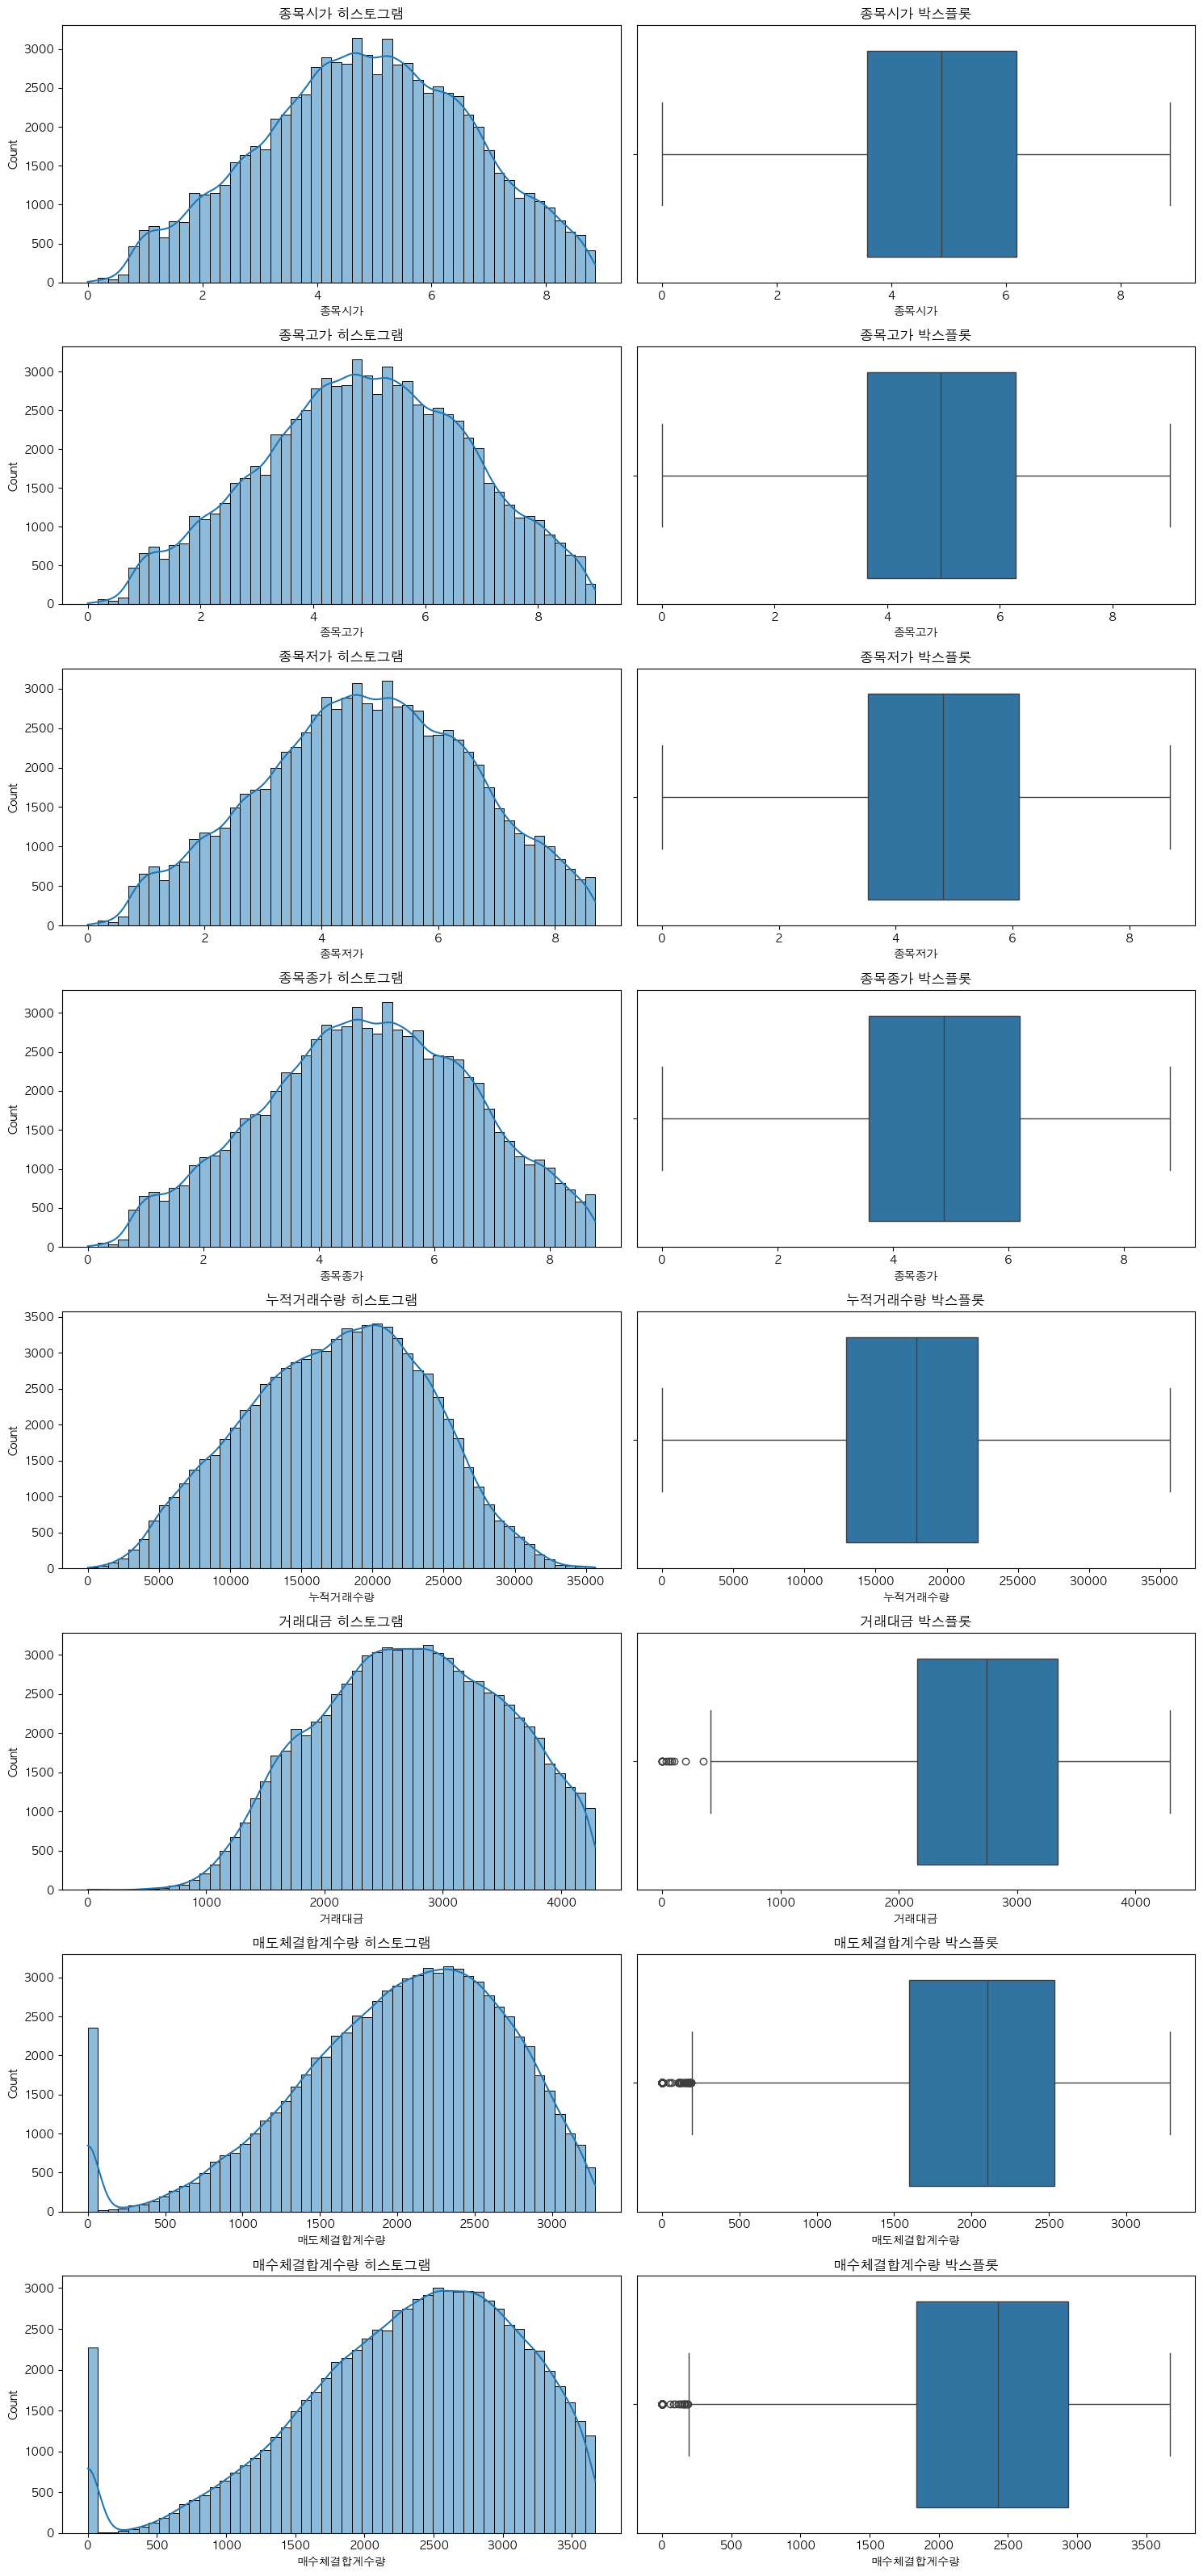

In [ ]:
# 왜도가 여전히 있는 변수들에 대해 box-cox변환 ('종목시가', '종목고가', '종목저가', '종목종가', '누적거래수량', '거래대금', '매도체결합계수량', '매수체결합계수량')
from scipy.stats import boxcox

# 변환할 변수 목록
variables = [
    '종목시가', '종목고가', '종목저가', '종목종가',
    '누적거래수량', '거래대금', '매도체결합계수량', '매수체결합계수량'
]

# Box-Cox 변환 함수
def boxcox_transform(df, column):
    # 모든 값이 양수인지 확인
    min_value = df[column].min()
    if min_value <= 0:
        # 최소값이 0보다 크도록 조정 (필요시)
        df[column] = df[column] + abs(min_value) + 1

    # Box-Cox 변환 적용
    transformed_data, _ = boxcox(df[column])
    df[column] = transformed_data

# 각 변수에 Box-Cox 변환 적용
for var in variables:
    boxcox_transform(stk_qut, var)

# 변환 후 전체 변수에 대한 시각화
fig, axes = plt.subplots(len(variables), 2, figsize=(15, len(variables) * 4))

for i, var in enumerate(variables):
    # 히스토그램
    sns.histplot(stk_qut[var], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} 히스토그램')

    # 박스플롯
    sns.boxplot(x=stk_qut[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} 박스플롯')

plt.tight_layout()
plt.show()

> 매도/매수체결합계수량에서 0쪽의 분포가 여전히 많음.

In [ ]:
# [2] NH데이터 테이블 - 1. NH데이터 기반 주식 일별 정보 (2024/05/28 ~ 2024/08/27)
nh_stkinfo = pd.read_csv("open/NH_CONTEST_NHDATA_STK_DD_IFO.csv")
print(nh_stkinfo.columns)
nh_stkinfo.columns = ['기준일자','티커종목코드','총보유계좌수','총보유수량','당사평균보유수량','당사평균보유비중비율',
                '당사평균평가손익','당사평균매입단가','당사평균수익율','당사평균보유기간일수','분포상위10퍼센트수치','분포상위30퍼센트수치',
                      '분포상위50퍼센트수치','분포상위70퍼센트수치','분포상위90퍼센트수치','기준종가','손실투자자비율',
                      '수익투자자비율','신규매수계좌수','전량매도계좌수','종목조회건수','관심종목등록건수']
print(nh_stkinfo.info())

Index(['bse_dt', 'tck_iem_cd', 'tot_hld_act_cnt', 'tot_hld_qty',
       'tco_avg_hld_qty', 'tco_avg_hld_wht_rt', 'tco_avg_eal_pls',
       'tco_avg_phs_uit_pr', 'tco_avg_pft_rt', 'tco_avg_hld_te_dd_cnt',
       'dist_hnk_pct10_nmv', 'dist_hnk_pct30_nmv', 'dist_hnk_pct50_nmv',
       'dist_hnk_pct70_nmv', 'dist_hnk_pct90_nmv', 'bse_end_pr', 'lss_ivo_rt',
       'pft_ivo_rt', 'ifw_act_cnt', 'ofw_act_cnt', 'vw_tgt_cnt',
       'rgs_tgt_cnt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81638 entries, 0 to 81637
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준일자         81638 non-null  int64  
 1   티커종목코드       81638 non-null  object 
 2   총보유계좌수       81638 non-null  int64  
 3   총보유수량        81638 non-null  int64  
 4   당사평균보유수량     81638 non-null  float64
 5   당사평균보유비중비율   81638 non-null  float64
 6   당사평균평가손익     81638 non-null  float64
 7   당사평균매입단가     81638 non-null  float64
 8   

In [ ]:
nh_stkinfo.tail(10)

,기준일자,티커종목코드,총보유계좌수,총보유수량,당사평균보유수량,당사평균보유비중비율,당사평균평가손익,당사평균매입단가,당사평균수익율,당사평균보유기간일수,분포상위10퍼센트수치,분포상위30퍼센트수치,분포상위50퍼센트수치,분포상위70퍼센트수,분포상90퍼센트수,기준종가,손실투자자비율,수익투자자비율,신규매수계좌수,전량매도계좌수,종목조회건수,관심종목등록건수
81628,20240612,ZS,158,1923,12.17,5.59,51614.97,265269.57,1.67,1.0,152560.0000,238094.000,265892.625,308020.000,355260.250,258469.110,0.5506,0.4494,3,0,226,14
81629,20240710,ZS,192,2230,11.61,5.47,174259.16,266521.00,5.81,1.0,164295.3000,252867.571,269822.250,291572.000,343684.200,273027.824,0.4479,0.5521,4,6,208,6
81630,20240814,ZS,178,2055,11.54,5.26,-151475.46,264855.58,-5.09,1.0,156919.0000,247751.000,268028.920,291918.727,350052.250,244584.847,0.7247,0.2753,0,1,81,6
81631,20240717,ZS,185,2146,11.60,5.52,268209.44,267208.15,8.95,1.0,157358.3125,252867.571,271639.500,292031.000,350052.250,281524.320,0.3784,0.6216,4,7,147,9
81632,20240607,ZS,154,1848,12.00,5.55,-106741.51,265560.19,-3.50,2.0,152560.0000,234418.000,269317.000,310027.667,355260.250,245402.495,0.6364,0.3636,1,3,126,1
81633,20240613,ZS,176,2123,12.06,5.53,63116.45,264799.14,2.05,1.0,155670.0000,243115.667,262808.000,296430.333,350410.333,260169.974,0.5455,0.4545,19,1,185,8
81634,20240823,ZS,168,1926,11.46,5.82,66275.68,266174.23,2.24,1.0,155670.0000,249586.333,269766.889,294261.000,350410.333,264214.302,0.5714,0.4286,0,2,53,0
81635,20240805,ZS,174,1985,11.41,5.28,-302673.13,266417.38,-10.23,3.0,156919.0000,252115.000,269822.250,292272.500,350410.333,232717.056,0.7701,0.2299,1,6,108,1
81636,20240712,ZS,186,2101,11.30,5.64,147470.45,266621.34,5.07,1.0,157358.3125,252867.571,269822.250,292031.000,350052.250,270389.192,0.4946,0.5054,0,4,156,8
81637,20240726,ZS,184,2030,11.03,5.71,-93869.23,267484.84,-3.26,1.0,157358.3125,255860.667,270152.333,291918.727,350052.250,252142.800,0.7391,0.2609,1,0,100,6


In [ ]:
1923/158

12.170886075949367

#### [2]-1. 컬럼별 분석 방향 잡기
- 기준일자: 날짜형 변환 및 종목코드별로 시계열 변환
- 티커종목코드:
- 총보유계좌수/총보유수량: 인기있는지 아닌지 알 수 있음. 시각화해서 보기.
- *당사평균보유수량*: =총보유수량/총보유계좌수. 즉 당사"계좌별"평균보유수량. 따라서 앞의 두개 없애고 이것만 살리는 것도 ㄱㅊ을듯?
- 당사평균보유비중비율: 이게 뭔지 모르게씀. 일단 패스.
- 당사평균평가손익
- 당사평균매입단가: 별로 중요x. 만약 쓴다면 고객에게 평단가가 얼마인지 알려줄때 정도...?
- *당사평균수익율*: 당사평균평가손익과 함께 움직임. 둘 중 하나만 남겨도 ㄱㅊ을듯. 아래 손실/수익투자자비율과 합쳐서 확인. 시각화해서 특출난 부분 확인
    - 종목코드별 수익율 변동 시각화. 너무 많이 움직이면 별로 안좋을듯.
- 당사평균보유기간일수: 단타 전략인지, 기간 확인용
- 분포상위10퍼센트수치/30/50/70/90: 왜 90퍼가 더 크지...? 상위 10퍼가 가격이 더 높아야 하는거 아닌가...? 이 수치가 정확히 뭔지를 모르겠음.
- 기준종가:
- 손실투자자비율/수익투자자비율: 두개 더하면 1나옴. 차이 큰거에 주목하기.
- 신규매수계좌수/종목조회건수/관심종목등록건수: 항상 높으면 인기있는 것. 잠깐 높았다면 그날 해당 etf에, 또는 들어있는 종목에 무슨일이 있었는지 알아보기.
- 전량매도계좌수: "전량"이라는 단어에 주목. 전량이라... 흠... "전량"매도되는 경우는? 수익 높거나/손절이거나/평균수량이 적거나 등등...

In [ ]:
# [2] NH데이터 테이블 - 2. 유입/유출 종목 데이터 (2024/05/28 ~ 2024/08/27)
nh_inout = pd.read_csv("open/NH_CONTEST_NHDATA_IFW_OFW_IFO.csv")
print(nh_inout.columns)
nh_inout.columns = ['기준일자','티커종목코드','유입/유출구분코드','유입유출티커코드','유입유출금액비중','유입유출랭크']
print(nh_inout.info())

Index(['bse_dt', 'tck_iem_cd', 'ifw_ofw_dit_cd', 'ifw_ofw_tck_cd',
       'ifw_ofw_amt_wht_rt', 'ifw_ofw_rnk'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73656 entries, 0 to 73655
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준일자       73656 non-null  int64  
 1   티커종목코드     73656 non-null  object 
 2   유입/유출구분코드  73656 non-null  int64  
 3   유입유출티커코드   73656 non-null  object 
 4   유입유출금액비중   73656 non-null  float64
 5   유입유출랭크     73656 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB
None


In [ ]:
nh_inout.head()

,기준일자,티커종목코드,유입/유출구분코드,유입유출티커코드,유입유출금액비중,유입유출랭크
0,20240617,AAL,2,ULTY,1.98,4
1,20240802,AAL,2,KAVL,86.08,1
2,20240802,AAL,2,SHY,13.92,2
3,20240725,AAL,2,TQQQ,93.84,1
4,20240610,AAL,2,ILMN,100.00,1


#### [2]-2. 컬럼별 분석 방향 잡기
- 유입/유출구분코드: 1-유입/2-유출, 번호별로 다시 데이터 확인.
- 유입유출금액비중: 해당 종목에서 유입/유출된 자금의 비중
- 유입유출랭크: 특정 기준일에 '티커종목코드'에서 자금이 유입되거나 유출된 종목들 간의 순위. 랭크가 1이면 해당 기준일에 가장 큰 유입 또는 유출이 발생한 종목

In [ ]:
# [2] NH데이터 테이블 - 3. NH데이터 기반 고객 보유 정보 (2024/05/28 ~ 2024/08/27)
nh_cusinfo = pd.read_csv("open/NH_CONTEST_NHDATA_CUS_TP_IFO.csv")
print(nh_cusinfo.columns)
nh_cusinfo.columns = ['기준일자','티커종목코드','고객구성대분류코드','고객구성중분류코드','고객구성계좌수비율','고객구성투자비율']
print(nh_cusinfo.info())

Index(['bse_dt', 'tck_iem_cd', 'cus_cgr_llf_cd', 'cus_cgr_mlf_cd',
       'cus_cgr_act_cnt_rt', 'cus_cgr_ivs_rt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195000 entries, 0 to 1194999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   기준일자       1195000 non-null  int64  
 1   티커종목코드     1195000 non-null  object 
 2   고객구성대분류코드  1195000 non-null  int64  
 3   고객구성중분류코드  1195000 non-null  int64  
 4   고객구성계좌수비율  1195000 non-null  float64
 5   고객구성투자비율   1195000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 54.7+ MB
None


In [ ]:
nh_cusinfo.head(10)

,기준일자,티커종목코드,고객구성대분류코드,고객구성중분류코드,고객구성계좌수비율,고객구성투자비율
0,20240826,AAL,2,22,37.2608,37.5675
1,20240826,AAL,2,25,4.8405,11.8565
2,20240826,AAL,2,21,21.4259,11.5923
3,20240826,AAL,2,23,23.9400,21.7531
4,20240816,AAL,2,21,21.4740,11.7051
5,20240816,AAL,2,22,37.4111,37.9536
6,20240610,AAL,3,33,9.0547,32.8094
7,20240610,AAL,3,32,19.8841,29.8300
8,20240610,AAL,3,31,70.8077,28.2717
9,20240610,AAL,3,34,0.2173,9.0886


#### [2]-3. 컬럼별 분석 방향 잡기
- 고객구성대분류코드: 1-투자실력/2-연령대/3-자산규모. 컬럼 3개로 나눠서 분석.
- 고객구성중분류코드: 대분류 컬럼3개로 나누고 거기에 중분류 넣기 ex) 투자실력 컬럼: 투자고수/일반투자자
- 고객구성계좌수비율: 버블차트 같은 걸로 대분류코드에 따라 계좌수 비율 확인 ex) 투자실력에 따른 계좌수비율
- 고객구성투자비율: 계좌수비율과 다른점은...? 계좌수비율에 비해 투자비율이 높다면 계좌당 투자를 많이 하는 것.

In [ ]:
# 고객구성대분류코드와 고객구성중분류코드에 따라 컬럼 이름 매핑
category_mapping = {1: '투자실력', 2: '연령대', 3: '자산규모'}

# 고객구성대분류코드를 컬럼명으로 변경하고 중분류코드 값을 넣기
nh_cusinfo['컬럼명'] = nh_cusinfo['고객구성대분류코드'].map(category_mapping)
nh_cusinfo['값'] = nh_cusinfo['고객구성중분류코드']

# 피벗 테이블을 사용해 데이터를 변환
pivot_df = nh_cusinfo.pivot_table(index=['기준일자', '티커종목코드'],
                                  columns='컬럼명',
                                  values='값',
                                  aggfunc='first').reset_index()

# 결과 출력
print(pivot_df)

컬럼명         기준일자        티커종목코드   연령대  자산규모  투자실력
0       20240528  AA            25.0  31.0  12.0
1       20240528  AAL           22.0  32.0  12.0
2       20240528  AAN           24.0  32.0  11.0
3       20240528  AAOI          23.0  32.0  12.0
4       20240528  AAON          22.0  31.0  12.0
...          ...           ...   ...   ...   ...
150981  20240826  ZUO           24.0  31.0  12.0
150982  20240826  ZURA          24.0  33.0  12.0
150983  20240826  ZVRA          23.0  33.0  12.0
150984  20240826  ZYME          21.0  31.0  12.0
150985  20240826  ZYXI          23.0  32.0  12.0

[150986 rows x 5 columns]


In [ ]:
print(pivot_df['투자실력'].value_counts()) # 11:투자고수, 12:일반투자자
print(pivot_df['연령대'].value_counts())  # 21:0~29세, 22:30~39세, 23:40~49세, 24:50~59세, 25:60세~
print(pivot_df['자산규모'].value_counts()) # 31:3천만원미만, 32:3천만원~1억원미만, 33:1억원이상~10억원미만, 34:10억원이상

투자실력
12.0    118711
11.0     32275
Name: count, dtype: int64
연령대
22.0    38504
23.0    35016
21.0    30803
24.0    28621
25.0    18042
Name: count, dtype: int64
자산규모
31.0    57275
32.0    42587
33.0    38654
34.0    12454
Name: count, dtype: int64


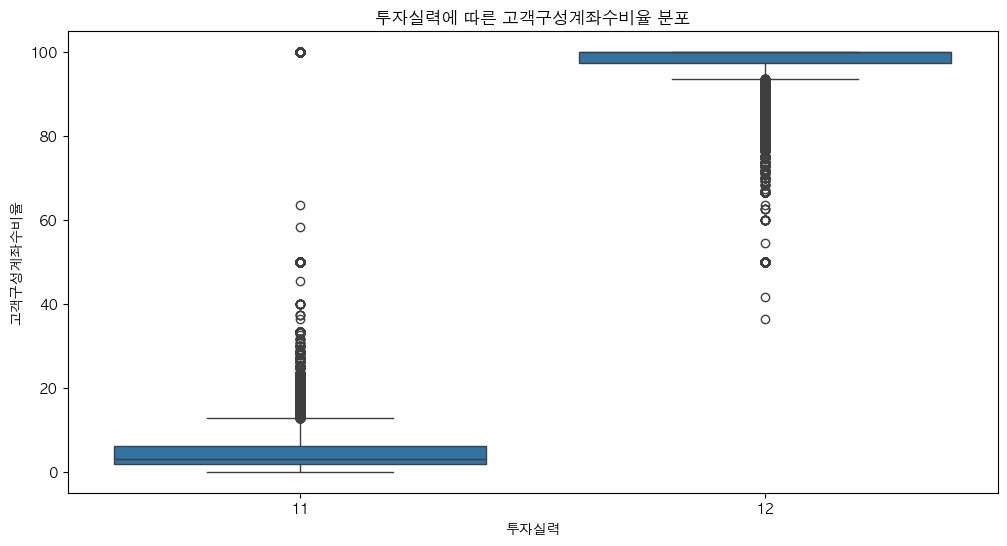

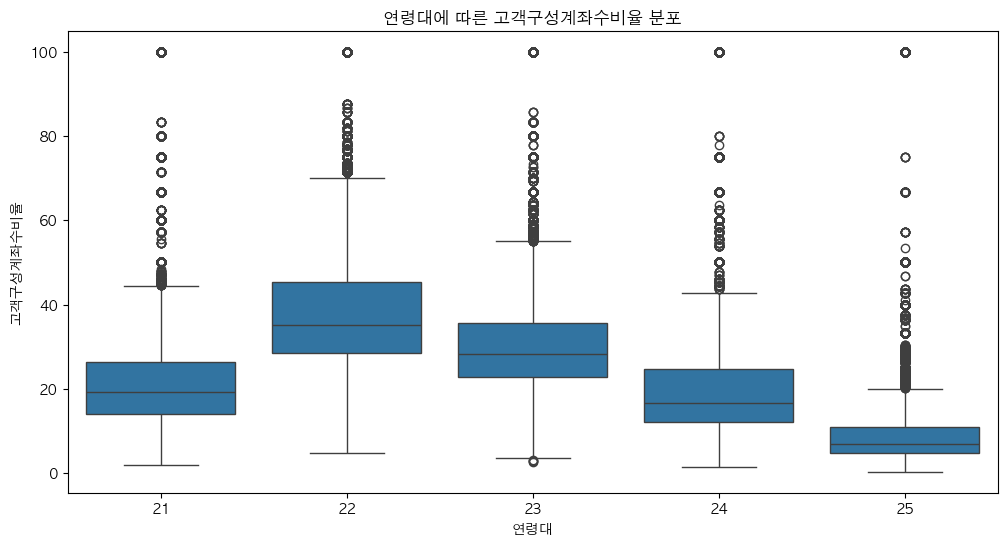

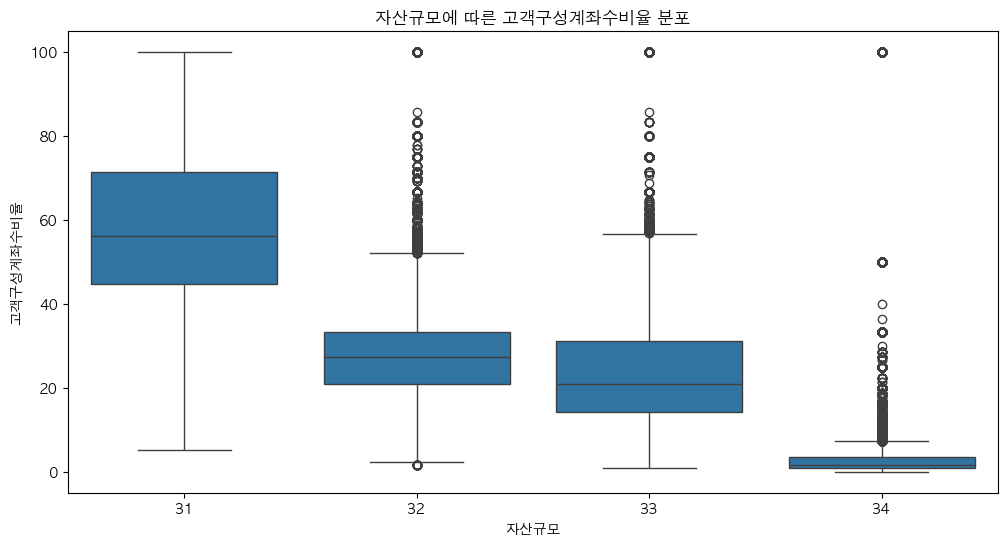

In [ ]:
# '고객구성중분류코드'가 1로 시작하는 값 필터링
filtered_df = nh_cusinfo[nh_cusinfo['고객구성중분류코드'].astype(str).str.startswith('1')]

# '고객구성중분류코드'와 '고객구성계좌수비율'에 따라 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='고객구성중분류코드', y='고객구성계좌수비율', data=filtered_df)
plt.title('투자실력에 따른 고객구성계좌수비율 분포')
plt.xlabel('투자실력')
plt.ylabel('고객구성계좌수비율')
plt.show()

# '고객구성중분류코드'가 2로 시작하는 값 필터링
filtered_df = nh_cusinfo[nh_cusinfo['고객구성중분류코드'].astype(str).str.startswith('2')]

# '고객구성중분류코드'와 '고객구성계좌수비율'에 따라 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='고객구성중분류코드', y='고객구성계좌수비율', data=filtered_df)
plt.title('연령대에 따른 고객구성계좌수비율 분포')
plt.xlabel('연령대')
plt.ylabel('고객구성계좌수비율')
plt.show()

# '고객구성중분류코드'가 3로 시작하는 값 필터링
filtered_df = nh_cusinfo[nh_cusinfo['고객구성중분류코드'].astype(str).str.startswith('3')]

# '고객구성중분류코드'와 '고객구성계좌수비율'에 따라 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='고객구성중분류코드', y='고객구성계좌수비율', data=filtered_df)
plt.title('자산규모에 따른 고객구성계좌수비율 분포')
plt.xlabel('자산규모')
plt.ylabel('고객구성계좌수비율')
plt.show()


In [ ]:
# [3] ETF 데이터 - 1. ETF의 구성 종목 (2024/08/27 기준)
etf_holdings = pd.read_csv("open/NH_CONTEST_DATA_ETF_HOLDINGS.csv")
print(etf_holdings.columns)
etf_holdings.columns = ['대상ETF티커','ETF개별구성종목티커','보유종목의가치(USD)','보유종목의영문명','보유종목의한글명',
                        '보유종목의 주수(주)','보유종목의 비중(%)','보유종목의 타입']
print(etf_holdings.info())

Index(['etf_tck_cd', 'tck_iem_cd', 'mkt_vlu', 'fc_sec_eng_nm', 'fc_sec_krl_nm',
       'stk_qty', 'wht_pct', 'sec_tp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대상ETF티커       40719 non-null  object 
 1   ETF개별구성종목티커   40719 non-null  object 
 2   보유종목의가치(USD)  40719 non-null  float64
 3   보유종목의영문명      40719 non-null  object 
 4   보유종목의한글명      40719 non-null  object 
 5   보유종목의 주수(주)   40719 non-null  int64  
 6   보유종목의 비중(%)   40719 non-null  float64
 7   보유종목의 타입      40719 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB
None


In [ ]:
etf_holdings.head(10)

,대상ETF티커,ETF개별구성종목티커,보유종목의가치(USD),보유종목의영문명,보유종목의한글명,보유종목의 주수(주),보유종목의 비중(%),보유종목의 타입
0,AAPB,AAPL,36858666.0,AAPL,애플,215737,66.778,ST
1,AAPB,USD,18337384.0,US Dollars,프로셰어즈 울트라 반도체,0,33.222,EF
2,AMDL,USD,3257693.0,US Dollars,프로셰어즈 울트라 반도체,0,33.282,EF
3,AMDL,AMD,6530355.0,AMD,에이엠디,36558,66.718,ST
4,CLOU,TWLO,15400502.0,TWILIO INC - A,트윌리오,254933,4.266,ST
5,CLOU,AKAM,15954631.0,AKAMAI TECHNOLOGIES INC,아카마이,157173,4.419,ST
6,CLOU,BOX,16465312.0,BOX INC - CLASS A,박스,598521,4.561,ST
7,CLOU,DLR,16796026.0,DIGITAL REALTY TRUST INC,디지털 리얼티,111884,4.652,ST
8,CLOU,SPSC,17322291.0,SPS COMMERCE INC,SPS 커머스,86202,4.798,ST
9,CLOU,WIX,21319125.0,WIX.COM LTD,윅스닷컴,131235,5.905,ST


#### [3]-1. 컬럼별 분석 방향 잡기
- 대상ETF티커: value_counts / unique 진행해서 총 etf몇개인지 확인
- 개별구성종목티커:
- 보유종목의가치: 보유종목 가치 높은 걸 가지고 있는 etf들 확인해보기. 그 중 비중 높은 거 확인해보기.
- 보유 종목의 타입: value_counts진행해보기

- 개별구성종목티커/보유종목한글명/보유종목타입 없이 영문명 똑같이 나와 있는 행들은 뭐징...? 뭘 의미하는걸까 생각해보기.

In [ ]:
# [3] ETF 데이터 - 2. ETF 배당 내역 (2024/05/28 ~ 2024/08/27)
etf_dividend = pd.read_csv("open/NH_CONTEST_DATA_HISTORICAL_DIVIDEND.csv")
print(etf_dividend.columns)
etf_dividend.columns = ['대상ETF티커','배당락일','배당금','수정 배당금','배당기준일','지급일','공시일','배당주기']
print(etf_dividend.info())

Index(['etf_tck_cd', 'ediv_dt', 'ddn_amt', 'aed_stkp_ddn_amt', 'ddn_bse_dt',
       'ddn_pym_dt', 'pba_dt', 'ddn_pym_fcy_cd'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12857 entries, 0 to 12856
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대상ETF티커  12857 non-null  object 
 1   배당락일     12857 non-null  int64  
 2   배당금      12857 non-null  float64
 3   수정 배당금   12857 non-null  float64
 4   배당기준일    12857 non-null  object 
 5   지급일      12857 non-null  int64  
 6   공시일      12857 non-null  object 
 7   배당주기     12857 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 803.7+ KB
None


In [ ]:
etf_dividend.head(10)

,대상ETF티커,배당락일,배당금,수정 배당금,배당기준일,지급일,공시일,배당주기
0,AAON,20230608,0.12,0.08,20230609,20230630,20230518,Quarterly
1,AAON,20240315,0.08,0.08,20240318,20240329,20240301,Quarterly
2,AAON,20230907,0.08,0.08,20230908,20230929,20230818,Quarterly
3,AAON,20230310,0.12,0.08,20230313,20230331,20230301,Quarterly
4,AAON,20221125,0.24,0.16,20221128,20221216,20221108,SemiAnnual
5,AAON,20231128,0.08,0.08,20231129,20231218,20231110,Quarterly
6,AAON,20240607,0.08,0.08,20240607,20240628,20240524,Quarterly
7,AAP,20221215,1.50,1.50,20221216,20230103,20221107,Quarterly
8,AAP,20240712,0.25,0.25,20240712,20240726,20240521,Quarterly
9,AAP,20240411,0.25,0.25,20240412,20240426,20240213,Quarterly


#### [3]-2. 컬럼별 분석 방향 잡기
- 대상티커: value_counts진행
- 수정배당금이 뭐임?????????
- 배당락일/배당기준일/지급일/공시일은 안중요하지 않을깡. 배당락일은 분기별로 체크해야될수도.
- 배당주기: value_counts진행해서 other(알수없음) 있는지 확인

- 배당금을 보는 고객들에게 가장 중요한 요소는 무엇일까? 기준일?지급일?공시일?주기?배당금?

In [ ]:
# [3] ETF 데이터 - 3. ETF 점수 정보 (2024/05/28 ~ 2024/08/27)
etf_score = pd.read_csv("open/NH_CONTEST_ETF_SOR_IFO.csv")
print(etf_score.columns)
etf_score.columns = ['거래일자','ETF개별구성종목티커','1개월총수익율','3개월총수익율','1년총수익율','ETF점수','ETFZ점수','Z점수순위',
                     '누적수익율Z점수','정보비율Z점수','샤프지수Z점수','상관관계Z점수','트래킹에러Z점수','최대낙폭Z점수','변동성Z점수']
print(etf_score.info())

Index(['bse_dt', 'etf_iem_cd', 'mm1_tot_pft_rt', 'mm3_tot_pft_rt',
       'yr1_tot_pft_rt', 'etf_sor', 'etf_z_sor', 'z_sor_rnk',
       'acl_pft_rt_z_sor', 'ifo_rt_z_sor', 'shpr_z_sor', 'crr_z_sor',
       'trk_err_z_sor', 'mxdd_z_sor', 'vty_z_sor'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   거래일자         3406 non-null   int64  
 1   ETF개별구성종목티커  3406 non-null   object 
 2   1개월총수익율      3406 non-null   float64
 3   3개월총수익율      3406 non-null   float64
 4   1년총수익율       3406 non-null   float64
 5   ETF점수        3406 non-null   float64
 6   ETFZ점수       3406 non-null   float64
 7   Z점수순위        3406 non-null   int64  
 8   누적수익율Z점수     3406 non-null   float64
 9   정보비율Z점수      3406 non-null   float64
 10  샤프지수Z점수      3406 non-null   float64
 11  상관관계Z점수      3406 non-null   float64
 12  트래킹에러Z점수     3406 non-null 

In [ ]:
etf_score.head(10)

,거래일자,ETF개별구성종목티커,1개월총수익율,3개월총수익율,1년총수익율,ETF점수,ETFZ점수,Z점수순위,누적수익율Z점수,정보비율Z점수,샤프지수Z점수,상관관계Z점수,트래킹에러Z점수,최대낙폭Z점수,변동성Z점수
0,20240613,AIYY,14.5337,-4.8952,0.0,13.676285,0.000000,1110,0.180343,0.721371,0.090171,5.139766,98.827773,0.450857,1.172227
1,20240717,AIYY,2.3820,19.5972,0.0,13.893617,0.000000,1129,0.088652,1.861702,0.177305,5.762411,98.670213,0.354610,1.329787
2,20240528,AIYY,-2.2155,-18.1966,0.0,20.203420,3.150315,1077,0.090009,0.090009,0.000000,71.557156,98.649865,0.450045,1.350135
3,20240618,AIYY,4.5304,-6.3123,0.0,13.652291,0.000000,1114,0.089847,0.718778,0.089847,5.031447,98.831986,0.449236,1.168014
4,20240712,AIYY,-5.8029,5.7098,0.0,13.651556,0.000000,1126,0.088889,1.422222,0.177778,4.000000,98.844444,0.266667,1.155556
5,20240604,AIYY,11.8607,-19.9178,0.0,14.540614,0.180505,1107,0.180505,0.541516,0.180505,13.898917,98.826715,0.451264,1.173285
6,20240614,AIYY,16.1244,-3.5014,0.0,13.614968,0.000000,1110,0.090171,0.631199,0.090171,4.779080,98.827773,0.450857,1.172227
7,20240823,AIYY,-5.0821,-5.4772,0.0,13.756076,0.086806,1152,0.086806,0.694444,0.173611,5.989583,98.524306,0.434028,1.475694
8,20240529,AIYY,-2.2155,-18.1966,0.0,20.232914,3.147482,1078,0.089928,0.089928,0.000000,71.852518,98.651079,0.449640,1.348921
9,20240730,AIYY,-1.4809,3.2644,0.0,13.820671,0.088339,1132,0.176678,0.795053,0.176678,6.360424,98.586572,0.441696,1.413428


#### [3]-3. 컬럼별 분석 방향 잡기
- 거래일자: